In [20]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt


In [21]:
pulmonary_df = pd.read_csv('Pulmonary.csv')

In [22]:
pulmonary_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1'],
      dtype='object')

In [23]:
pulmonary_df['DataValueUnit'].value_counts()

DataValueUnit
%                    39525
cases per 1,000      15272
cases per 100,000    13250
cases per 10,000      8184
Name: count, dtype: int64

In [24]:
pulmonary_df['Question'].value_counts()


Question
Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years             12729
Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years                  10473
Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years    10179
Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years                                   9402
Prevalence of chronic obstructive pulmonary disease among adults >= 18                                                                   6839
Prevalence of chronic obstructive pulmonary disease among adults >= 45 years                                                             6576
Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease                                    52

In [25]:
pulmonary_df['LocationAbbr'].value_counts()

LocationAbbr
FL    2592
NC    2486
AZ    2445
NJ    2384
NY    2265
MD    2263
NV    2226
WI    2215
MI    2207
KY    2204
WA    2126
CO    2083
SC    2014
MN    2011
GA    2010
AR    2009
IA    2008
OR    2000
HI    1978
CA    1964
NM    1938
TX    1903
MA    1893
RI    1882
OK    1772
OH    1753
NE    1724
VA    1702
KS    1683
IN    1667
PA    1666
IL    1659
MS    1642
SD    1635
LA    1596
MO    1589
CT    1587
WV    1583
AL    1579
UT    1568
DC    1520
VT    1516
TN    1512
AK    1493
DE    1428
MT    1426
ME    1309
ND    1289
ID    1274
WY    1263
NH    1199
US    1050
PR     544
GU     245
VI       5
Name: count, dtype: int64

In [26]:
#This code will show me if the YearStart column and the YearEnd column are all the same or not
same_years = (pulmonary_df['YearStart'] == pulmonary_df['YearEnd']).all()

if same_years:
    print("The 'YearStart' and 'YearEnd' columns have the same values in all rows.")
else:
    print("The 'YearStart' and 'YearEnd' columns do not have the same values in all rows.")

The 'YearStart' and 'YearEnd' columns have the same values in all rows.


In [27]:
#need to put the YearStart in order
pulmonary_df=pulmonary_df.sort_values(by='YearEnd')
pulmonary_df

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
38201,2010,2010,FL,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,119.16,"cases per 1,000",Age-adjusted Rate,NaN,100.16,138.15,Race/Ethnicity,American Indian or Alaska Native
42056,2010,2010,IN,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,81.00,"cases per 1,000",Age-adjusted Rate,NaN,80.33,81.67,Race/Ethnicity,"White, non-Hispanic"
35840,2010,2010,MS,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,20910.00,NaN,Number,NaN,NaN,NaN,Race/Ethnicity,"White, non-Hispanic"
5338,2010,2010,PA,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,90.80,"cases per 100,000",Age-adjusted Rate,NaN,87.60,94.10,Gender,Female
35839,2010,2010,UT,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,381.00,NaN,Number,NaN,NaN,NaN,Gender,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,2021,2021,US,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,37.70,%,Age-adjusted Prevalence,US estimate/number is based on fewer than 50 s...,35.40,40.90,Overall,Overall
59799,2021,2021,CT,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,5.00,%,Age-adjusted Prevalence,NaN,2.80,8.90,Race/Ethnicity,"Black, non-Hispanic"
69000,2021,2021,KY,Chronic Obstructive Pulmonary Disease,Influenza vaccination among noninstitutionaliz...,52.80,%,Crude Prevalence,NaN,47.10,58.40,Overall,Overall
68979,2021,2021,KY,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,46.10,%,Age-adjusted Prevalence,NaN,38.00,54.40,Race/Ethnicity,"White, non-Hispanic"


In [28]:
#This would turn 'YearEnd' into a date time by year but im sure why would need to do this will investigate more
#pulmonary_df['YearEnd'] = pd.to_datetime(pulmonary_df['YearEnd'], format='%Y')

#This code allows us to display value counts in order by year so we can see the order of years and how many rows of data each year contains
# use this code if you convert to datetime (year_end_counts = pulmonary_df['YearEnd'].dt.year.value_counts().sort_index())
year_end_counts = pulmonary_df['YearEnd'].value_counts().sort_index()
year_end_counts
#data summary for years: it looks like 2007 could be considered an outlier and possibly unusable for our analysis

YearEnd
2010    5706
2011    7931
2012    7969
2013    9410
2014    9836
2015    9715
2016    9133
2017    8830
2018    9060
2019    7054
2020    6932
2021    3008
Name: count, dtype: int64

In [29]:
# chekcing the dtype of the column 'YearEnd', thus far int64 is our goal, but might check again if datetime becomes our targeted dtype
pulmonary_df['YearEnd'].dtype


dtype('int64')

In [30]:
#need to explore what kind of data we have in the DataValue comlumn to see what we can compare and use for a graph
#footnotes should give me an idea of what the numbers mean, check against documentation for further understanding
#need to understand if the questions datavalue is infering more or lesslikley hood of chronic desease
#Questions could be something that we could compare, need to check if the datavalues are comparable for all the same Questions
#what will groupby do if i groupby question: desired result it will group all same questions together to have comparable data amongst the same questions
#I might also need to groupby year: desired result all the same question whithin a particular year grouped together so I can show yearly changes with comparable data
#The LocationAbbr includes US, which has to be addressed
#we need to seperate or group by year,question, stratificationCategory1 and then stratification1 if not Overall


pulmonary_df


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
38201,2010,2010,FL,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,119.16,"cases per 1,000",Age-adjusted Rate,NaN,100.16,138.15,Race/Ethnicity,American Indian or Alaska Native
42056,2010,2010,IN,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,81.00,"cases per 1,000",Age-adjusted Rate,NaN,80.33,81.67,Race/Ethnicity,"White, non-Hispanic"
35840,2010,2010,MS,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,20910.00,NaN,Number,NaN,NaN,NaN,Race/Ethnicity,"White, non-Hispanic"
5338,2010,2010,PA,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,90.80,"cases per 100,000",Age-adjusted Rate,NaN,87.60,94.10,Gender,Female
35839,2010,2010,UT,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,381.00,NaN,Number,NaN,NaN,NaN,Gender,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,2021,2021,US,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,37.70,%,Age-adjusted Prevalence,US estimate/number is based on fewer than 50 s...,35.40,40.90,Overall,Overall
59799,2021,2021,CT,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,5.00,%,Age-adjusted Prevalence,NaN,2.80,8.90,Race/Ethnicity,"Black, non-Hispanic"
69000,2021,2021,KY,Chronic Obstructive Pulmonary Disease,Influenza vaccination among noninstitutionaliz...,52.80,%,Crude Prevalence,NaN,47.10,58.40,Overall,Overall
68979,2021,2021,KY,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,46.10,%,Age-adjusted Prevalence,NaN,38.00,54.40,Race/Ethnicity,"White, non-Hispanic"


In [31]:
smokless_df =pulmonary_df.loc[pulmonary_df['Question'] == 'Current smokeless pulmonary use among adults aged >= 18 years']
smokless_df

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1


In [32]:
#This groups the dataframe first by Year and then question, StratificationCat1, stratification, and finally groups by location
#It then applys a lambda function to make sure the years are in order.
#This currently does not address US in the locations with individual states
grouped_pulmonary_df = pulmonary_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(
    lambda x: x.sort_values(by = 'YearEnd')).reset_index(drop = True)

grouped_pulmonary_df.head()

/var/folders/v3/vqm7wj0557b3qz_jytk9mscc0000gn/T/ipykernel_8233/3832744956.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_pulmonary_df = pulmonary_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2010,2010,AZ,Chronic Obstructive Pulmonary Disease,Emergency department visit rate for chronic ob...,456.26,"cases per 10,000",Age-adjusted Rate,NaN,452.61,459.90,Gender,Female
1,2010,2010,AZ,Chronic Obstructive Pulmonary Disease,Emergency department visit rate for chronic ob...,60100.00,NaN,Number,NaN,NaN,NaN,Gender,Female
2,2010,2010,AZ,Chronic Obstructive Pulmonary Disease,Emergency department visit rate for chronic ob...,463.71,"cases per 10,000",Crude Rate,NaN,460.01,467.42,Gender,Female
3,2010,2010,CA,Chronic Obstructive Pulmonary Disease,Emergency department visit rate for chronic ob...,380.43,"cases per 10,000",Crude Rate,NaN,379.00,381.86,Gender,Female
4,2010,2010,CA,Chronic Obstructive Pulmonary Disease,Emergency department visit rate for chronic ob...,384.80,"cases per 10,000",Age-adjusted Rate,NaN,383.35,386.24,Gender,Female


In [33]:
#use this to look at a list of possible questions to choose from
grouped_pulmonary_df['Question'].value_counts()

Question
Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years             12729
Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years                  10473
Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years    10179
Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years                                   9402
Prevalence of chronic obstructive pulmonary disease among adults >= 18                                                                   6839
Prevalence of chronic obstructive pulmonary disease among adults >= 45 years                                                             6576
Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease                                    52

In [34]:
#The question is can we turn this into a function to apply to other csvs???

#creates a list with all the target valus in the Questions column
questions = grouped_pulmonary_df['Question'].unique().tolist()
#creating an empty dictionary to store dataframes with their own unique questions
dfs = {}
#looping through our grouped dataframe to create multiple dataframes containing only one question along with its values and then storing them in a dictionary
# also sets their key values to the target question in their respective dataframes
for question in questions:
    df_name = question
    dfs[df_name] = grouped_pulmonary_df.loc[grouped_pulmonary_df['Question'] == question]\
        .loc[grouped_pulmonary_df['LocationAbbr'] == 'US']\
        .loc[grouped_pulmonary_df['StratificationCategory1'] == 'Overall']





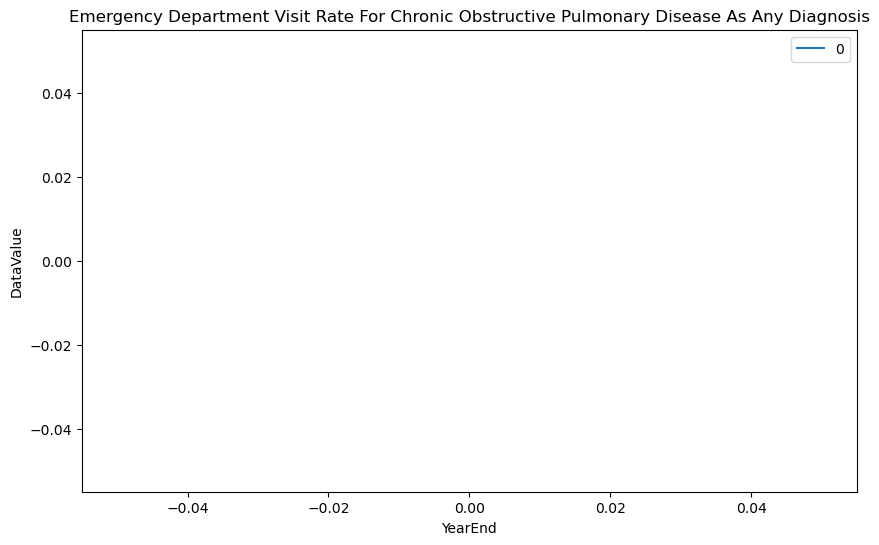

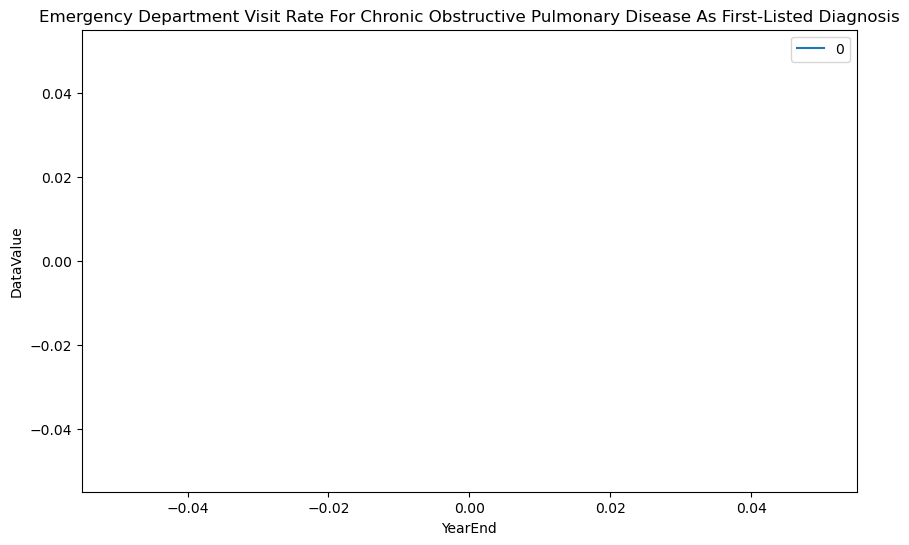

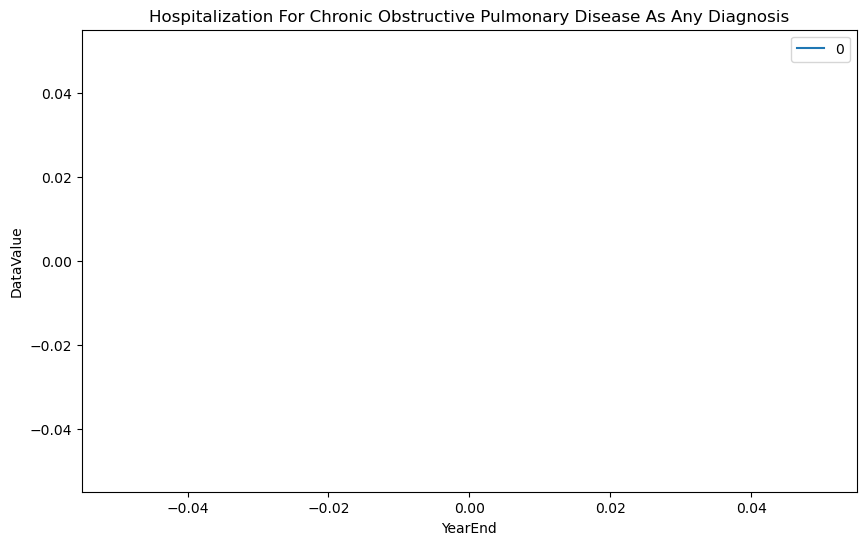

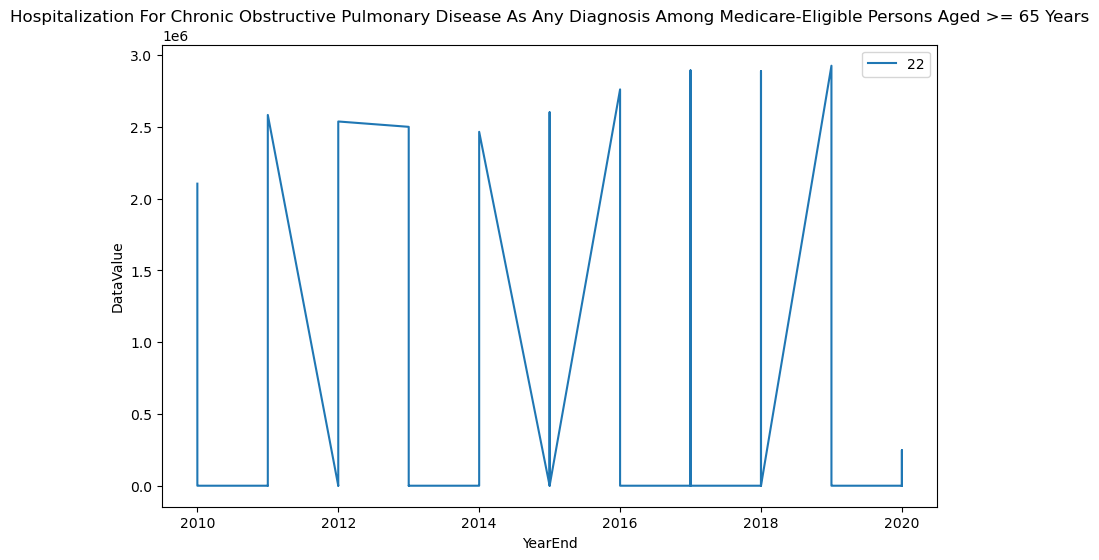

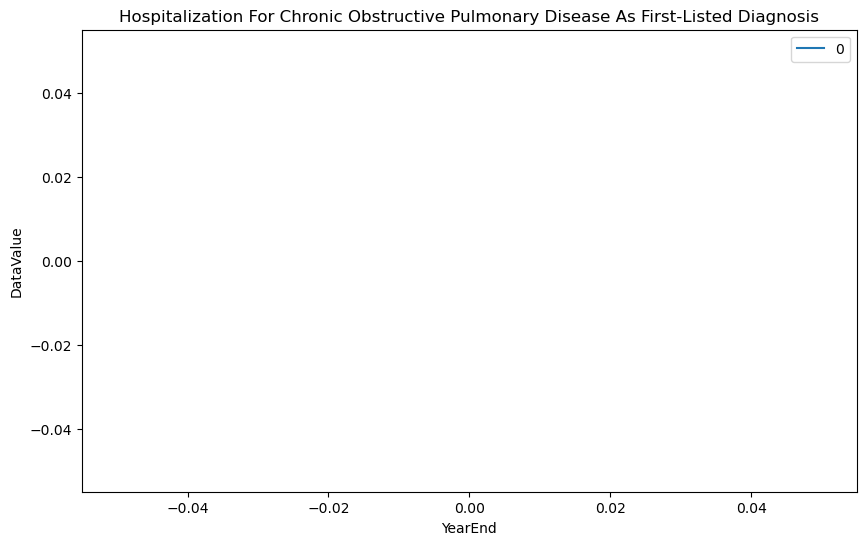

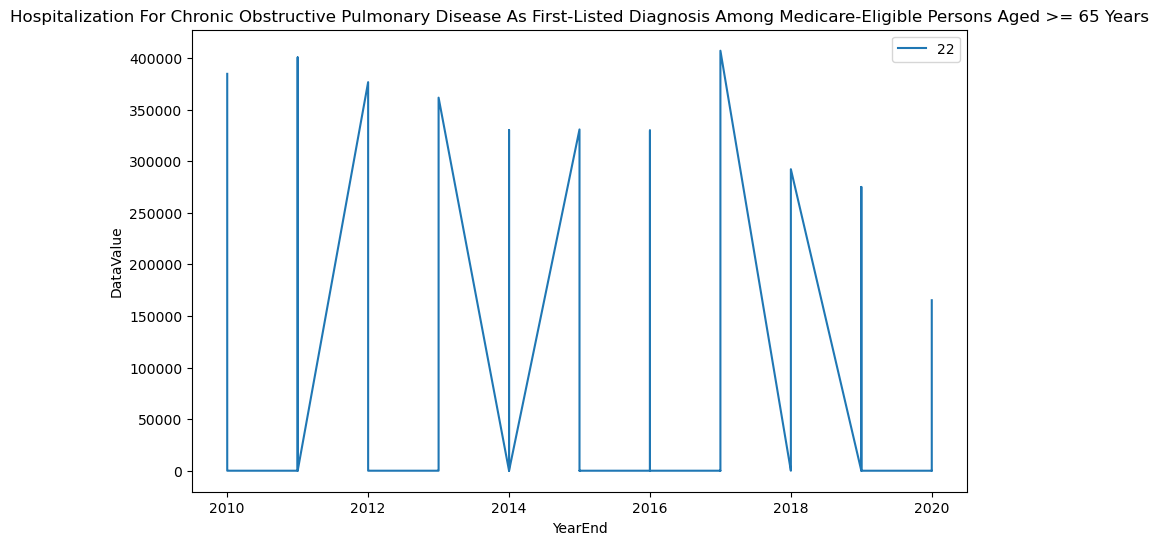

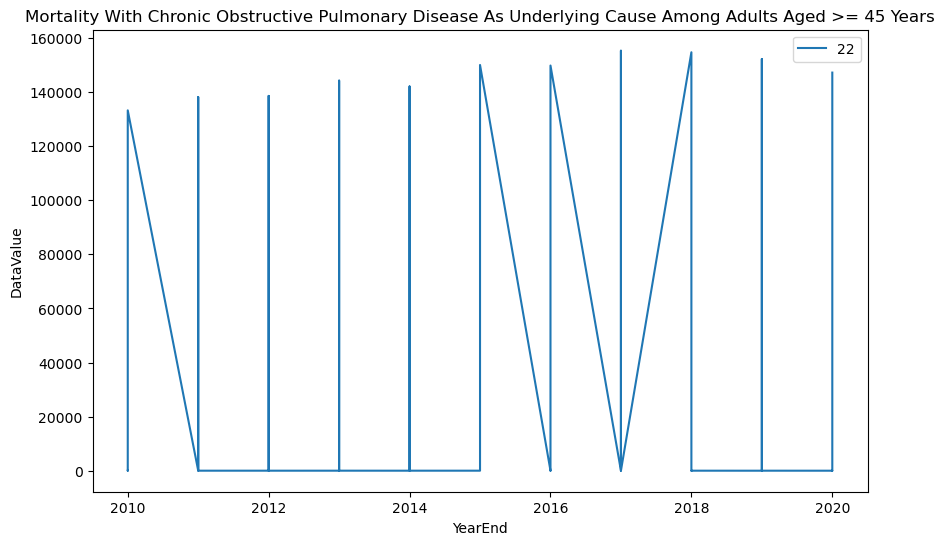

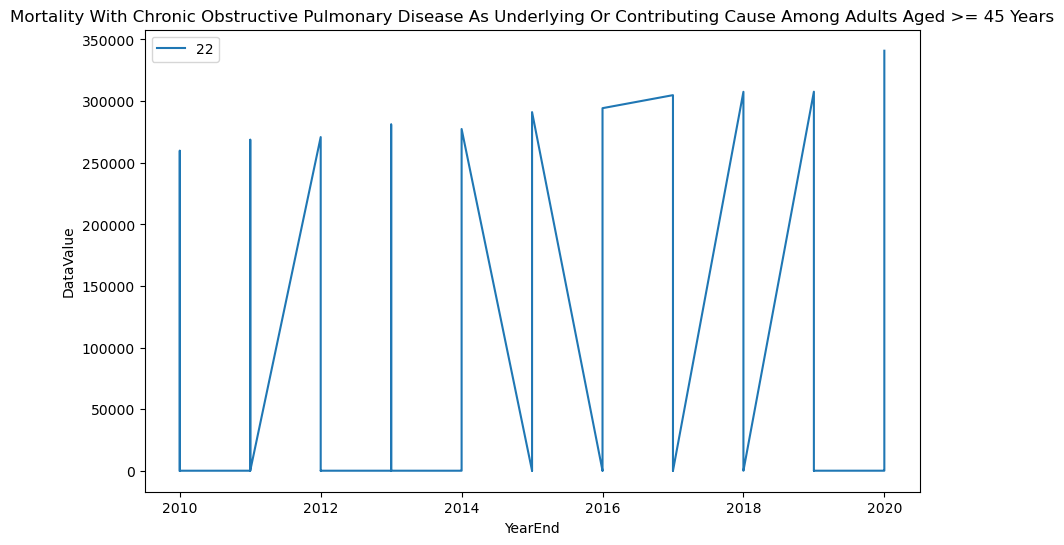

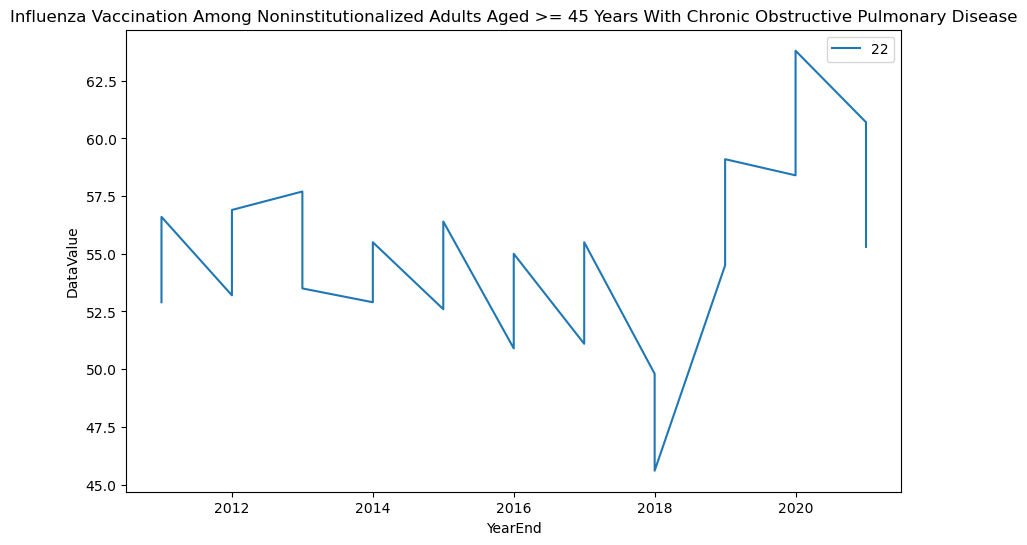

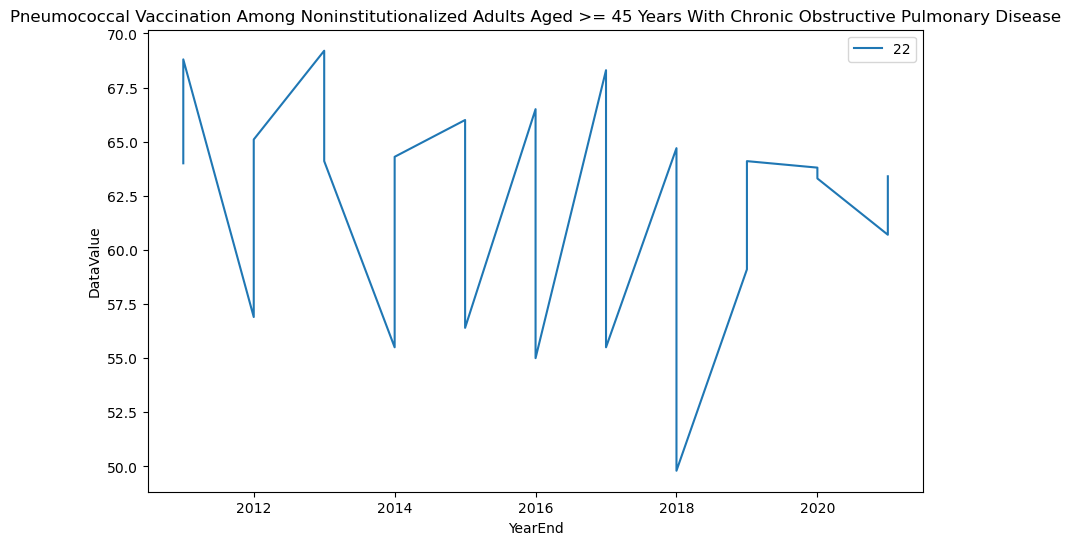

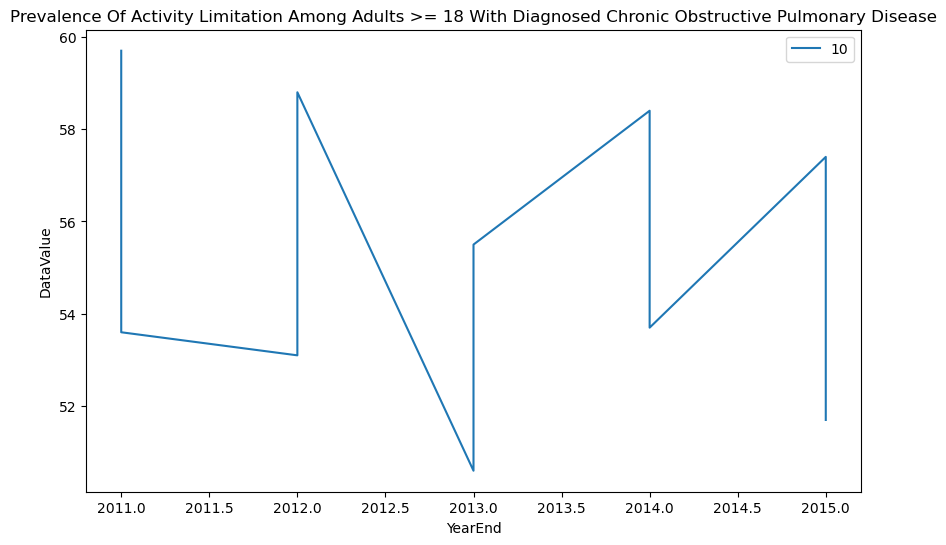

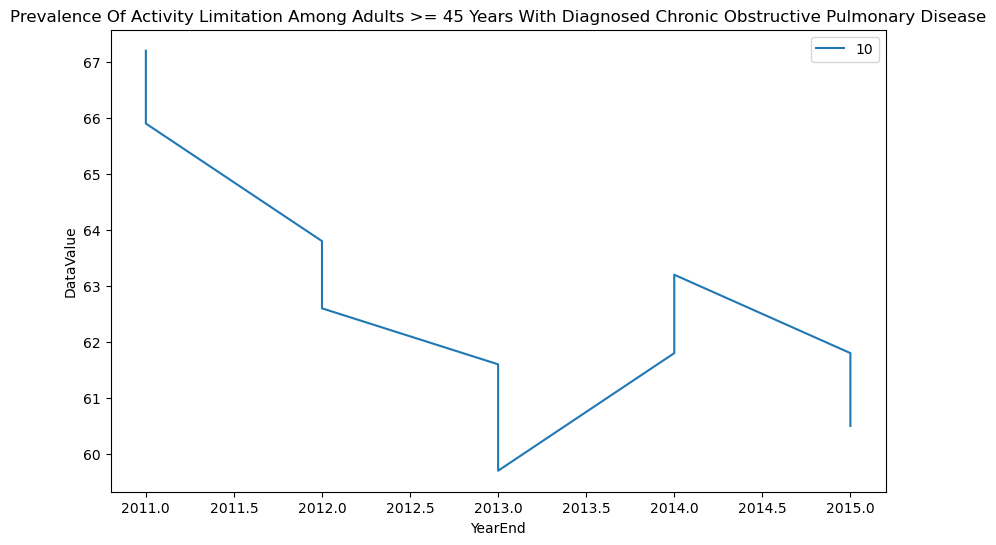

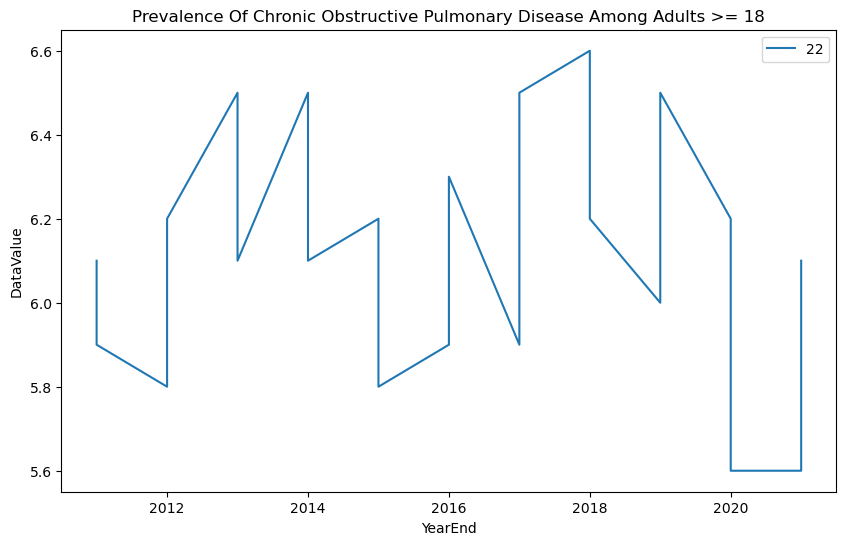

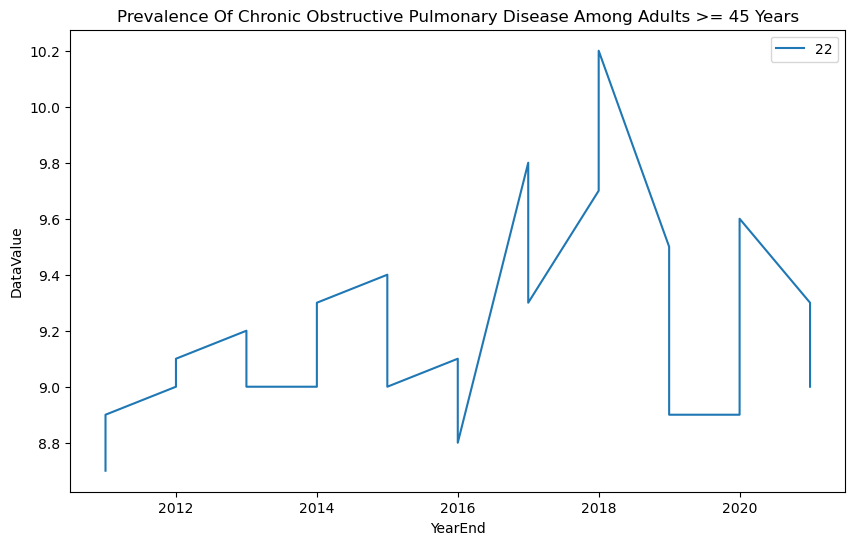

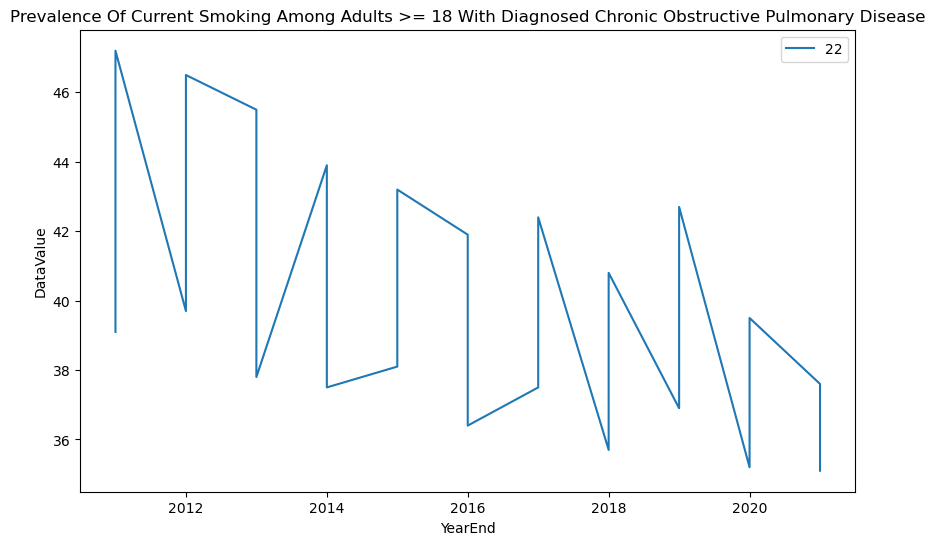

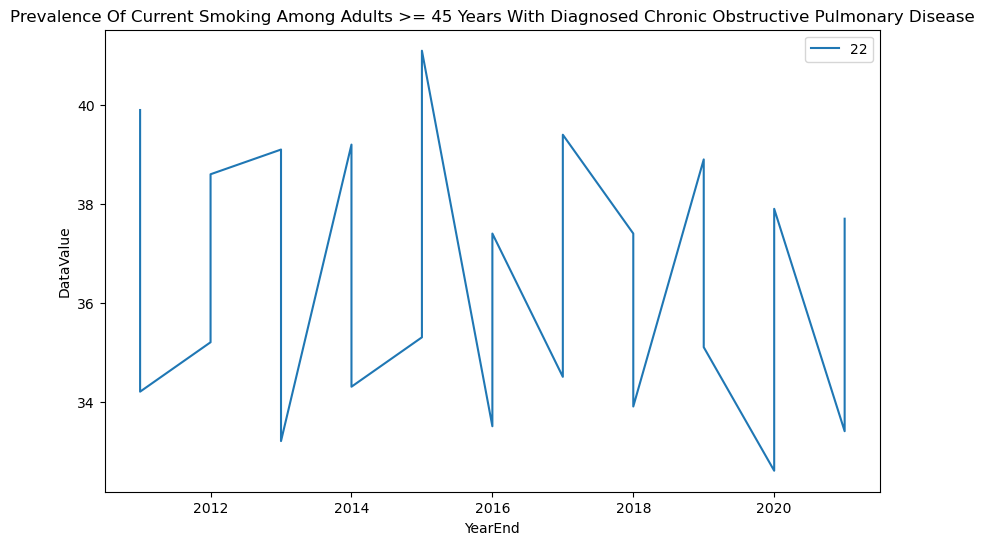

In [35]:
#loops through the dfs dictionary to extract the individual dfs by their 'Question' name and then plot them by yearend and datavalue
for df_name, df in dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['YearEnd'], df['DataValue'], label=df['DataValueUnit'].count())
    plt.xlabel('YearEnd')
    plt.ylabel('DataValue')
    title = df_name.replace('_', ' ').title()
    plt.title(title)
    plt.legend()
    plt.savefig(f'{title}.png')
    plt.show()

Results: 'Percent tobacco revenue to fund at CDC recommended level' & 'Sale of cigarette packs' & 'Secondary schools that have a comprehensive tobacco-free school policy in place' dataframes don't have US or possibly Overall data causing them to be empty

dataframes with similar datavalue units that we could possibly plot on one graph:
    us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
    us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
#The top two have ranges 14 to 22 and the bottom has 15 to 21 could possibly combine these
    us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']

#range 4 to 9
    us_overall_smokeless_youth_df=dfs['Current smokeless tobacco use among youth']
#range 6 to 16
    us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']

#range 52 to 66
    us_overall_quit_tobacco_df = dfs['Quit attempts in the past year among current smokers']
#range 60 to 68
    us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
#range 50 to 62
    us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']




In [36]:
#renaming all the dataframes in the dfs{} and storing them in their respective dataframes
us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']
us_overall_quit_pulmonary_df = dfs['Quit attempts in the past year among current smokers']
us_overall_pneumococcal_vaccination_adult_age18_64_smokers_df =dfs['Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke']
us_overall_smokeless_pulmonary_adult_df = dfs['Current smokeless pulmonary use among adults aged >= 18 years']
us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']
us_overall_smokeless_youth_df=dfs['Current smokeless pulmonary use among youth']
us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']
us_overall_sale_cigarette_packs=dfs['Sale of cigarette packs']
us_overall_2nd_school_pulmonary_free_policy=dfs['Secondary schools that have a comprehensive pulmonary-free school policy in place']
us_overall_pulmonary_revenue_fund_cdc_level = dfs['Percent pulmonary revenue to fund at CDC recommended level']

KeyError: 'Current smoking among adults aged >= 18 years'

<Axes: xlabel='YearEnd'>

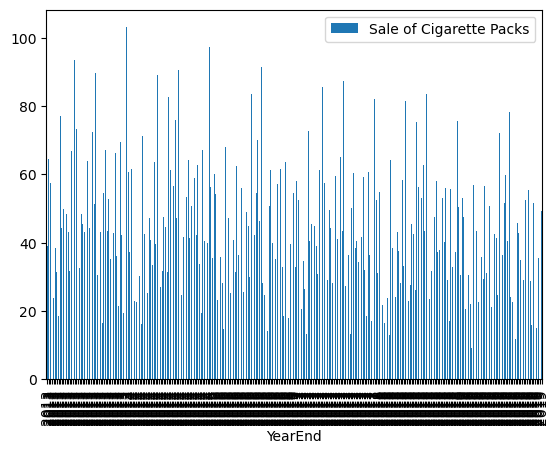

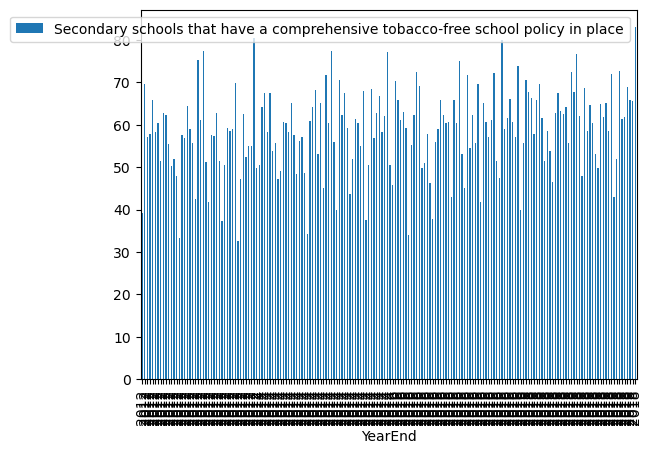

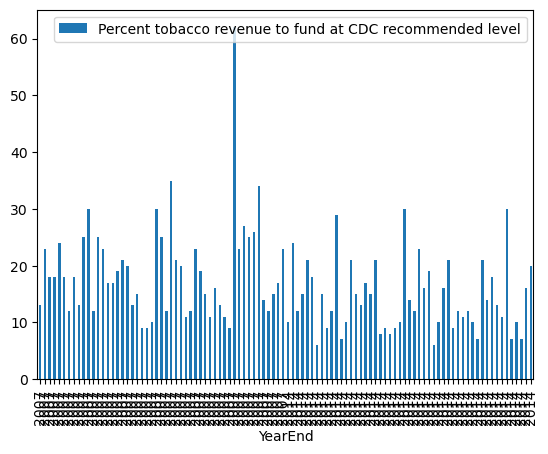

In [ ]:
#filter these by location and possibly Overall and maybe we could make a bar graph?
overall_sale_cigarette_packs_df=grouped_pulmonary_df.loc[grouped_pulmonary_df['Question'] == 'Sale of cigarette packs']\
.loc[grouped_pulmonary_df['StratificationCategory1'] == 'Overall']

overall_2nd_school_pulmonary_free_policy_df = grouped_pulmonary_df.loc[grouped_pulmonary_df['Question'] == 'Secondary schools that have a comprehensive pulmonary-free school policy in place']\
.loc[grouped_pulmonary_df['StratificationCategory1'] == 'Overall']

overall_pulmonary_revenue_fund_cdc_level_df =grouped_pulmonary_df.loc[grouped_pulmonary_df['Question'] == 'Percent pulmonary revenue to fund at CDC recommended level']\
.loc[grouped_pulmonary_df['StratificationCategory1'] == 'Overall'] 

#overall_sale_cigarette_packs_df
#overall_2nd_school_pulmonary_free_policy_df
#overall_pulmonary_revenue_fund_cdc_level_df

overall_sale_cigarette_packs_df.plot(kind ='bar', x = 'YearEnd', y = "DataValue", label = 'Sale of Cigarette Packs')
overall_2nd_school_pulmonary_free_policy_df.plot(kind ='bar',x = 'YearEnd', y = "DataValue", label = 'Secondary schools that have a comprehensive pulmonary-free school policy in place')
overall_pulmonary_revenue_fund_cdc_level_df.plot(kind ='bar', x = 'YearEnd', y = "DataValue", label = 'Percent pulmonary revenue to fund at CDC recommended level')
#plt.legend()
#plt.figure(figsize=(20,10))

In [ ]:
#lets choose a question with an easy to understand and compareble data value with the location being the US and the stratification being overall
# ill start by looking at questions and datavaluess
us_overall_smokingb4pregnancy_df =grouped_pulmonary_df.loc[grouped_pulmonary_df['Question'] == 'Cigarette smoking before pregnancy'].loc[grouped_pulmonary_df['LocationAbbr'] == 'US']\
.loc[grouped_pulmonary_df['StratificationCategory1'] == 'Overall']

us_overall_quit_pulmonary_df =grouped_pulmonary_df.loc[grouped_pulmonary_df['Question'] == 'Quit attempts in the past year among current smokers'].loc[grouped_pulmonary_df['LocationAbbr'] == 'US']\
.loc[grouped_pulmonary_df['StratificationCategory1'] == 'Overall']
#us_overall_smokingb4pregnancy_df
#us_overall_quit_pulmonary_df.info()
#us_overall_quit_pulmonary_df[['DataValue', 'DataValueUnit', 'DataValueType']]

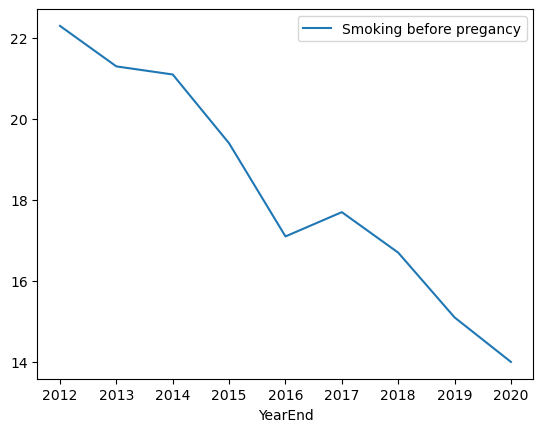

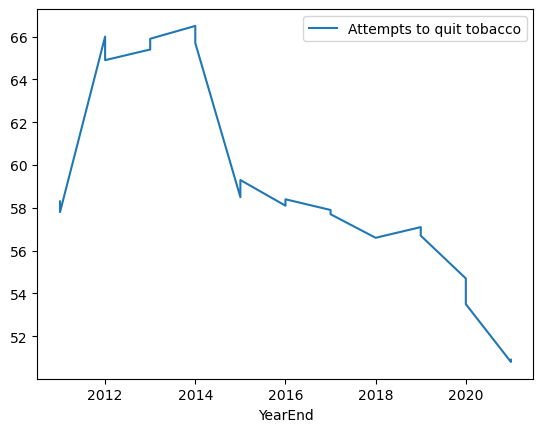

In [ ]:
us_overall_smokingb4pregnancy_df.plot(x = 'YearEnd', y = "DataValue", label = 'Smoking before pregancy')
us_overall_quit_pulmonary_df.plot(x = 'YearEnd', y = "DataValue", label = 'Attempts to quit pulmonary')
plt.legend()

# plt.plot(us_overall_quit_pulmonary_df['YearEnd'], us_overall_quit_pulmonary_df['DataValue'], label = "Attempts to quit pulmonary")
# plt.plot(us_overall_smokingb4pregnancy_df["YearEnd"], us_overall_smokingb4pregnancy_df['DataValue'], label = 'Smoking before pregancy')
# plt.legend()


# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
# plt.xlabel('Year')
# plt.ylabel('Question')
# plt.title('pulmonary')
# plt.legend()

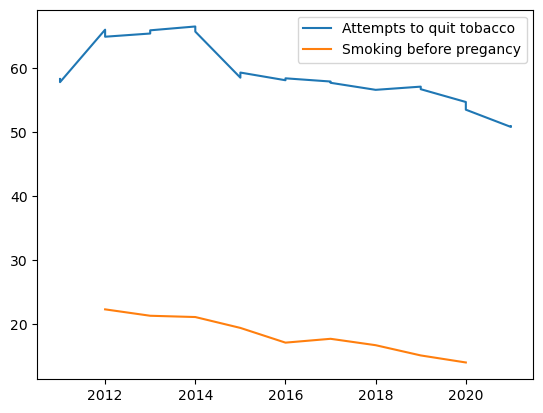

In [ ]:
plt.plot(us_overall_quit_pulmonary_df['YearEnd'], us_overall_quit_pulmonary_df['DataValue'], label = "Attempts to quit pulmonary")
plt.plot(us_overall_smokingb4pregnancy_df["YearEnd"], us_overall_smokingb4pregnancy_df['DataValue'], label = 'Smoking before pregancy')
plt.legend()


# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
# plt.xlabel('Year')
# plt.ylabel('Question')
# plt.title('pulmonary')
# plt.legend()

In [ ]:
pulmonary_df['Question'].value_counts()

Question
Current smoking among adults aged >= 18 years                                                                                                                                          8645
Quit attempts in the past year among current smokers                                                                                                                                   6293
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke                                                                                                  5852
Current smokeless tobacco use among adults aged >= 18 years                                                                                                                            5384
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke                                                                                                  4497
Current cigarette smoking among women aged 18-44 ye

In [ ]:
#we first filtered the dataframe to only include 2 questions as well as location = US, stratification = Overall

question_year_df =grouped_pulmonary_df.loc[grouped_pulmonary_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless pulmonary use among adults aged >= 18 years'])].loc[grouped_pulmonary_df['LocationAbbr'] == 'US']\
.loc[grouped_pulmonary_df['StratificationCategory1'] == 'Overall']

#put each question into its own list
# Create new columns based on the values in the 'Initial_Column'
question_year_df['Question1'] = np.where(question_year_df['Question'] =='Current smoking among adults aged >= 18 years',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df['Question2'] = np.where(question_year_df['Question'] =='Current smokeless pulmonary use among adults aged >= 18 years',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df.head()


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Question1,Question2
594,2011,2011,US,Tobacco,Current smokeless tobacco use among adults age...,4.4,%,Crude Prevalence,50 States + DC: US Median,3.6,4.8,Overall,Overall,NaN,4.4
595,2011,2011,US,Tobacco,Current smokeless tobacco use among adults age...,4.5,%,Age-adjusted Prevalence,50 States + DC: US Median,3.7,5.0,Overall,Overall,NaN,4.5
1115,2011,2011,US,Tobacco,Current smoking among adults aged >= 18 years,21.2,%,Crude Prevalence,50 States + DC: US Median,20.0,22.4,Overall,Overall,21.2,NaN
1116,2011,2011,US,Tobacco,Current smoking among adults aged >= 18 years,21.3,%,Age-adjusted Prevalence,50 States + DC: US Median,20.3,22.5,Overall,Overall,21.3,NaN
3808,2012,2012,US,Tobacco,Current smokeless tobacco use among adults age...,4.1,%,Age-adjusted Prevalence,50 States + DC: US Median,3.9,4.7,Overall,Overall,NaN,4.1


In [ ]:
question_year_df.columns


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Question1', 'Question2'],
      dtype='object')

In [ ]:
question_year_filter = question_year_df[['YearEnd','Question1','Question2']]
#question_year_filter.set_index("YearEnd")
question_year_filter.head()

,YearEnd,Question1,Question2
594,2011,NaN,4.4
595,2011,NaN,4.5
1115,2011,21.2,NaN
1116,2011,21.3,NaN
3808,2012,NaN,4.1


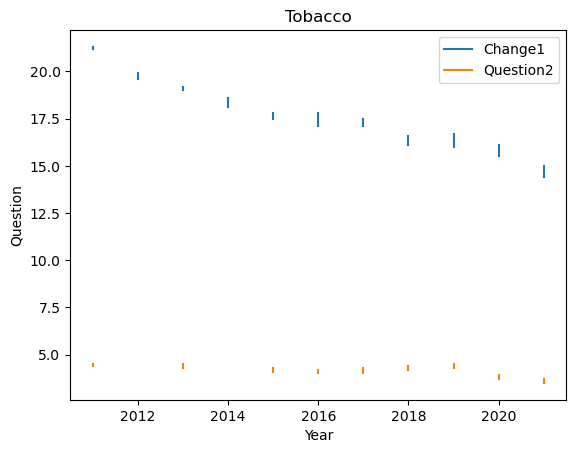

In [ ]:
#ploting 2 question on the same graph with YearEnd as the x axis
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
plt.xlabel('Year')
plt.ylabel('Question')
plt.title('pulmonary')
plt.legend()

C:\Users\tyzwh\AppData\Local\Temp\ipykernel_32328\2962594156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)


<Axes: >

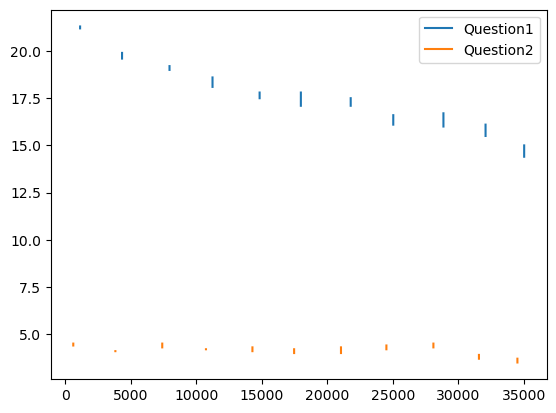

In [ ]:
#df['column_name'] = df['column_name'].astype(int)
question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)

question_year_filter[['Question1', 'Question2']].plot()



#question_year_filter.plot(y = 'Question1', 'Question2')


In [ ]:
us_overall_df =grouped_pulmonary_df.loc[grouped_pulmonary_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless pulmonary use among adults aged >= 18 years'])].loc[grouped_pulmonary_df['LocationAbbr'] == 'US']\
.loc[grouped_pulmonary_df['StratificationCategory1'] == 'Overall']

us_overall_df.tail()


<Axes: title={'center': 'Question'}, xlabel='YearEnd', ylabel='DataValue'>

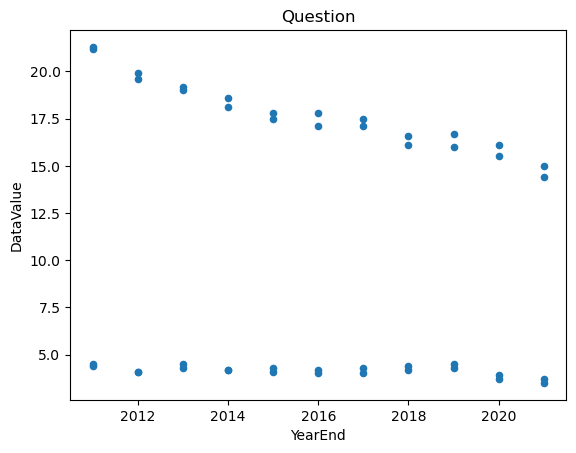

In [ ]:
us_overall_df.plot(kind = 'scatter', x='YearEnd', y= 'DataValue', title ='Question' )